#### Load labels from data folder

In [ ]:
import os
from pathlib import Path

DATA_FOLDER = "/data/data/dataset_nuclei_tiles"

labels = {}
with open(os.path.join(DATA_FOLDER, "labels.csv")) as f:
    for line in f.readlines()[1:]:
        tile_id, label = line.rstrip().split(",")
        labels[int(tile_id)] = 0 if label == "NO_NUCLEUS" else 1

tiles_files = list(Path(DATA_FOLDER).glob('*.png'))

#### Check the data: How many samples have missing labels, are the labels balanced, ... ?

In [20]:
n_samples = len(tiles_files)
n_annots = len(labels)
n_nuclei = len([1 for l in labels.values() if l==1])
n_no_nucleus = n_annots - n_nuclei
print("DATASET STATISTICS:")
print(f"  Number of images: {n_samples}")
print(f"  Number of labels: {n_annots} ({n_annots*100/n_samples:.1f}%)")
print(f"  Labels class balance: {n_nuclei} NUCLEI ({n_nuclei*100/n_annots:.1f}%) / {n_no_nucleus} NO NUCLEUS ({n_no_nucleus*100/n_annots:.1f})%")

DATASET STATISTICS:
  Number of images: 4936
  Number of labels: 2251 (45.6%)
  Labels class balance: 1447 NUCLEI (64.3%) / 804 NO NUCLEUS (35.7)%


FIRST OBSERVATIONS:

- Only 45.6% of the samples are annotated -> we could probably benefit from a weakly supervised learning approach, if data appears to be insufficient
- Tiles without any nucleus are underrepresented (only 1/3 of the images), we will have to make sure we take this into account during training

#### Display some samples for each class, to better understand the data we are working with:

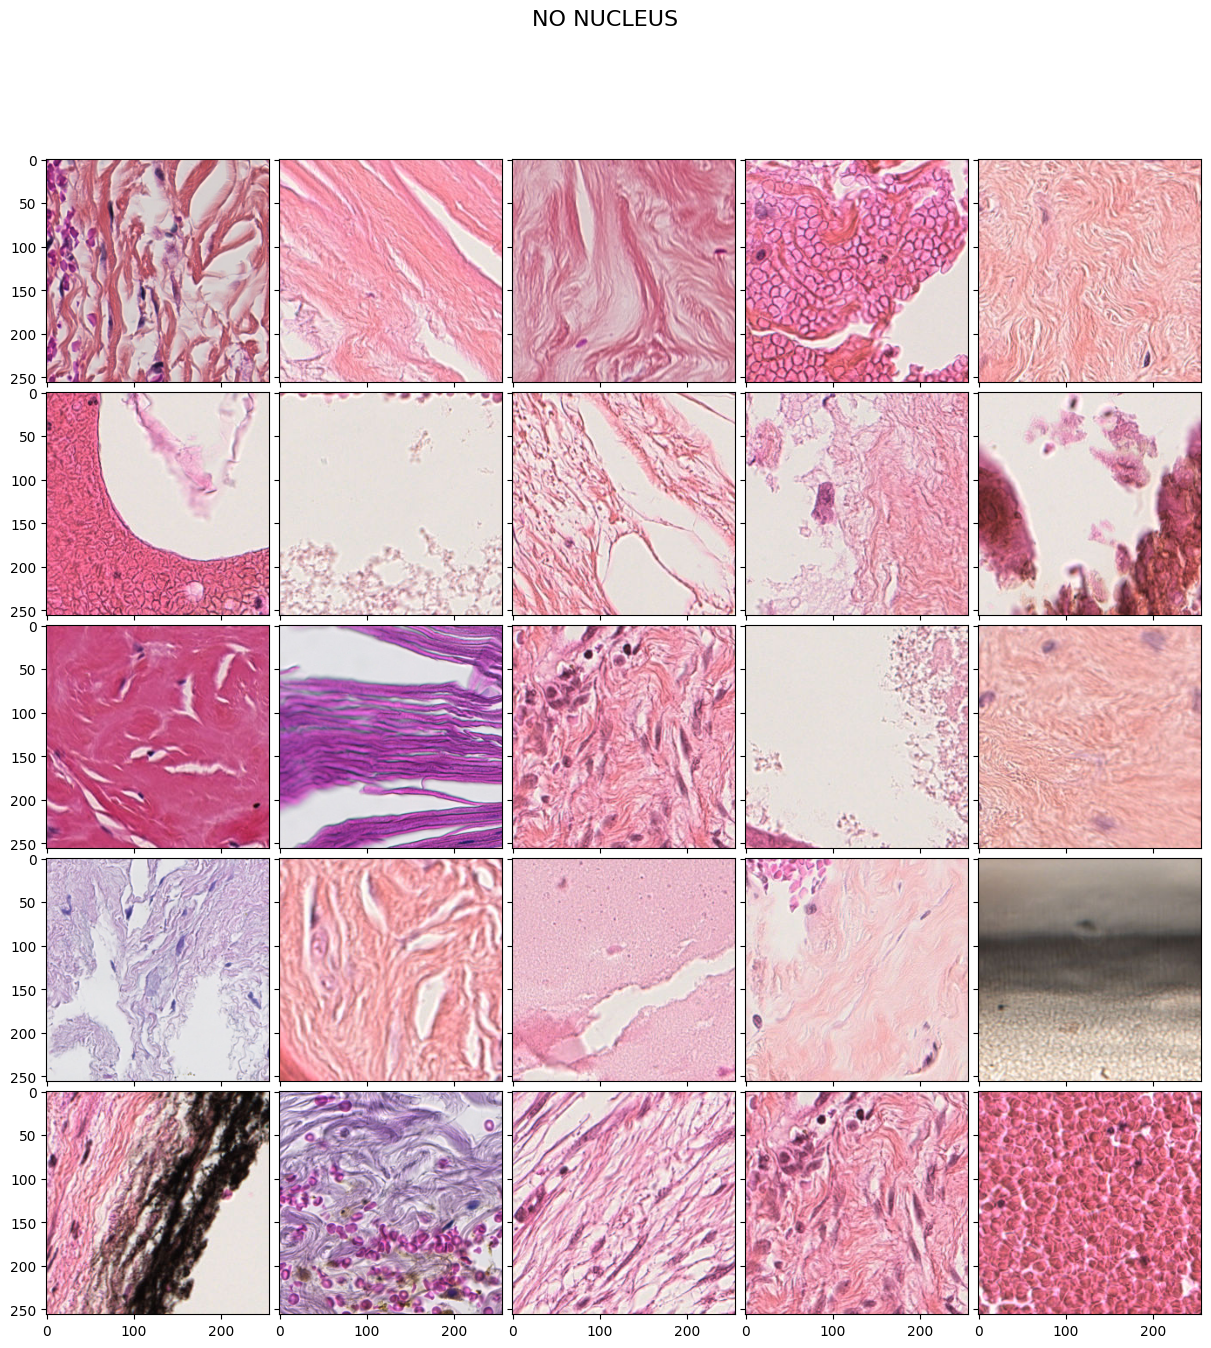

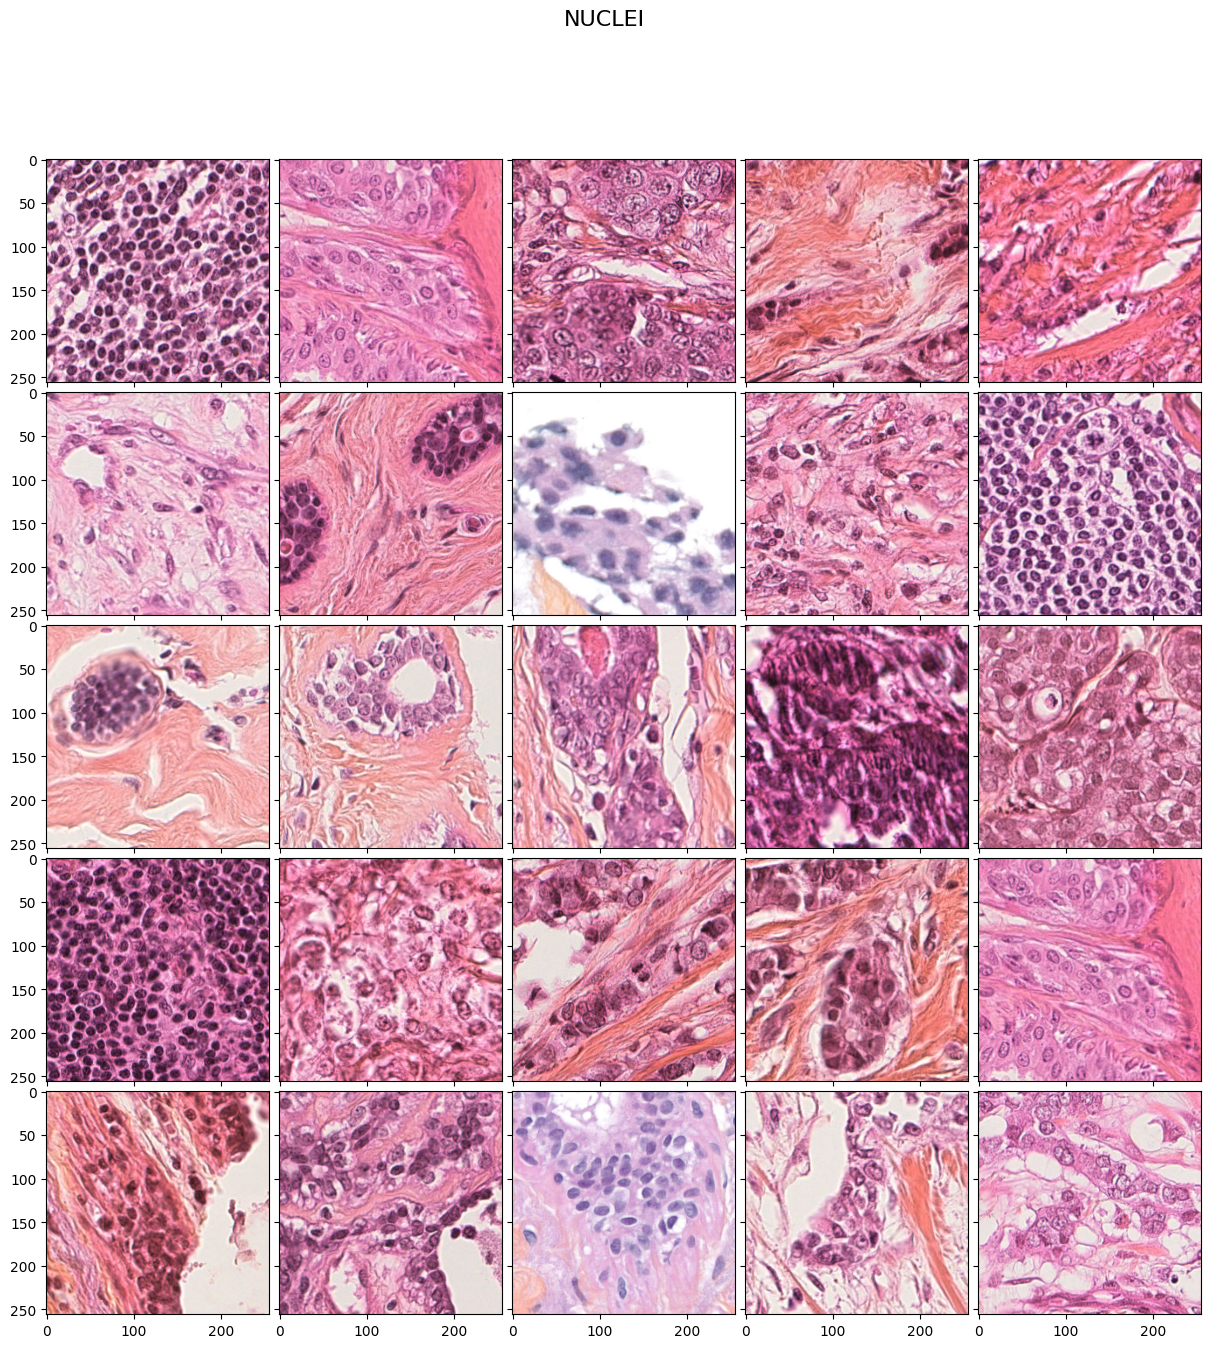

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.axes_grid1 import ImageGrid

for label in [0,1]:
    n_rows = 5
    tiles = [tid for tid, l in labels.items() if l == label]
    tiles = np.random.choice(tiles, size = n_rows*n_rows)
    images = [mpimg.imread(os.path.join(DATA_FOLDER, f'tile_{tid}.png')) for tid in tiles]

    fig = plt.figure(figsize=(3. * n_rows, 3. * n_rows))
    fig.suptitle("NUCLEI" if label == 1 else "NO NUCLEUS", fontsize=16)
    grid = ImageGrid(fig, 111, nrows_ncols=(n_rows, n_rows), axes_pad=0.1)

    for ax, im in zip(grid, images):
        ax.imshow(im)

    plt.show()

OBSERVATIONS:

We observe a lot of variations in color/structure/shape between images of a same group, comforting us in the idea that any 'classical' computer vision approach such as contour detection or structural similarity will not be very efficient. A CNN-based ML algorithm seems more promising